[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


Text(0.5, 1.0, 'check')

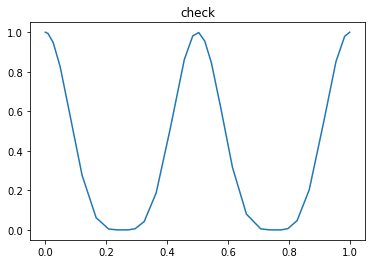

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sigx=np.asarray([[0,1],[1,0]])
id2=np.identity(2)


energyscale=2.0*np.pi
H=np.kron(sigx,id2)+np.kron(id2,sigx)

H=H*energyscale

rho=(1+0j)*np.zeros(16)
rho[0]=1.0
print(rho)



def apply_tdse_dense2(t,y):
    """Computes ``-i [H(s), rho(s)]`` for density vector ``y`` by reshaping ``y``
    """
    ymat = y.reshape((4, 4))
    ymat = -1j * (H@(ymat) - ymat@H)
    f = ymat.reshape(16)
    return f


def solve_mixed(rho):
    """Solves the TDSE
    """
    
    sol = solve_ivp(
        fun=apply_tdse_dense2,
        t_span=(0,1),
        y0=rho
    )
    return sol

sol=solve_mixed(rho)
print(sol.y[:,0])



plt.plot(sol.t,np.absolute(sol.y[0,:]))
plt.title("check")